<a href="https://colab.research.google.com/github/umairali777/machine_learning_project_1.ipynb/blob/main/Cancer_gene_expression_classification_with_support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
y = pd.read_csv('actual.csv')

In [ ]:
print(y)

    patient cancer
0         1    ALL
1         2    ALL
2         3    ALL
3         4    ALL
4         5    ALL
..      ...    ...
67       68    ALL
68       69    ALL
69       70    ALL
70       71    ALL
71       72    ALL

[72 rows x 2 columns]


let's change ALL and AML CLASS with 0 and 1 respectively

In [ ]:
y_dep = y.replace({'ALL':0, 'AML':1})

In [ ]:
y['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

we have datsets of leukemia cance class ALL and AML, we have two samples one for training other for testing  with 7129 features(variables).

In [ ]:
Test_1 = pd.read_csv("data_set_ALL_AML_independent.csv")
Test_1.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [ ]:
Test_1.shape

(7129, 70)

In [ ]:
Train_1 = pd.read_csv("data_set_ALL_AML_train.csv")

In [ ]:
Train_1.shape

(7129, 78)

In [ ]:
Train_1.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
Train_1.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

we can see we columns with call they don't contain any information better to drop those columns

In [ ]:
Train_1.drop(columns=['call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5',
                                'call.6', 'call.7', 'call.8', 'call.9', 'call.10', 'call.11', 'call.12',
                                'call.13', 'call.14', 'call.15', 'call.16', 'call.17', 'call.18', 'call.19',
                                'call.20', 'call.21', 'call.22', 'call.23', 'call.24', 'call.25', 'call.26',
                                'call.27', 'call.28', 'call.29', 'call.30', 'call.31', 'call.32', 'call.33', 'call.34',
                                'call.35', 'call.36', 'call.37'], inplace=True) 

In [ ]:
Train_1.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [ ]:
Test_1.columns

Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46', 'call.10', '70', 'call.11', '71', 'call.12', '72',
       'call.13', '68', 'call.14', '69', 'call.15', '67', 'call.16', '55',
       'call.17', '56', 'call.18', '59', 'call.19', '52', 'call.20', '53',
       'call.21', '51', 'call.22', '50', 'call.23', '54', 'call.24', '57',
       'call.25', '58', 'call.26', '60', 'call.27', '61', 'call.28', '65',
       'call.29', '66', 'call.30', '63', 'call.31', '64', 'call.32', '62',
       'call.33'],
      dtype='object')

In [ ]:
Test_1.drop(columns=['call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5', 'call.6', 'call.7', 'call.8', 'call.9', 'call.10', 'call.11', 'call.12', 'call.13', 'call.14', 'call.15', 'call.16', 'call.16', 'call.17', 'call.18', 'call.19', 'call.20', 'call.21', 'call.22', 'call.23', 'call.24', 'call.25', 'call.26', 'call.27', 'call.28', 'call.29', 'call.30', 'call.31', 'call.32', 'call.33'], inplace=True)

In [ ]:
Test_1.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


we can see in training and testing datsets columns name are not in order so we first we write in numeric order. 

In [ ]:
train_col = ['Gene Description', 'Gene Acession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
x_Train = Train_1.reindex(columns=train_col)

In [ ]:
test_col = ['Gene Description', 'Gene Acession Number', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51','52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69','70', '71', '72']
x_Test = Test_1.reindex(columns=test_col)

## Because our features are in rows first we transpose rows into the columns weherwe will have indeendent variables in columns and patients as index lable.

In [ ]:
x_TR = x_Train.T
x_Te = x_Test.T

In [ ]:
x_TR.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Acession Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
x_TR_2 = x_TR.rename(columns=x_TR.iloc[0]).iloc[1:]

In [ ]:
x_Te_2 = x_Te.rename(columns=x_Te.iloc[0]).iloc[1:]

In [ ]:
 x_Te_2.drop(index='Gene Acession Number', inplace=True)

In [ ]:
x_TR_2.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products},HMG2 High-mobility group (nonhistone chromosomal) protein 2,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7)
Gene Acession Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91


In [ ]:
x_TR_2.drop(index='Gene Acession Number', inplace=True)

In [ ]:
x_TR_2.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products},HMG2 High-mobility group (nonhistone chromosomal) protein 2,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7)
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
x_Te_2.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products},HMG2 High-mobility group (nonhistone chromosomal) protein 2,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7)
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [ ]:
x_TR_2.reset_index(drop=True)
y_tr = y_dep[y_dep.patient <=38].reset_index(drop=True)

In [ ]:
x_Te_2.reset_index(drop=True)
y_te = y_dep[y_dep.patient>38].reset_index(drop=True)

In [ ]:
y_tr.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


for better outcome we will convert data into float.

In [ ]:
x_T_f = x_TR_2.astype(float,64)
x_Te_f = x_Te_2.astype(float,64)

In thsi istep we will scaled data or centralised data before applying dimwnsion reduction technique PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_scal = scaler.fit_transform(x_T_f)
x_te_scaler = scaler.transform(x_Te_f)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [ ]:
x_t_pca = pca.fit_transform(x_scal)

In [ ]:
x_te_pca = pca.transform(x_te_scaler)

In [ ]:
x_t_pca

array([[ 1.83403510e+01,  5.58718351e+00, -1.91842370e+01, ...,
        -2.42301654e+00, -7.09696564e-01,  1.45793593e-14],
       [-7.79684900e+00,  1.05407520e+01,  1.09540802e+01, ...,
         3.95409923e+00, -1.45283873e-01,  1.45793593e-14],
       [ 5.24616857e+01,  1.06044501e+01, -2.96332060e+01, ...,
        -3.14358153e+00,  3.51841565e+00,  1.45793593e-14],
       ...,
       [ 2.45600748e+01, -1.40358876e+01,  4.89785339e+01, ...,
        -1.48742540e+00,  2.15521132e+00,  1.45793593e-14],
       [ 1.61403880e+01, -2.42841958e+01,  4.35403453e+01, ...,
         2.29474982e+00, -1.22464595e+00,  1.45793593e-14],
       [ 1.55002074e+01, -1.54530344e+01,  2.72792522e+01, ...,
        -9.60559672e-01,  5.30188261e+00,  1.45793593e-14]])

explained variance ratio basically tells us how mach each eigen vaue explained variance related to original data, we will compute in cumilative sum

In [ ]:
var_e =np.cumsum(pca.explained_variance_ratio_)

In [ ]:
var_e

array([0.15118469, 0.27218152, 0.33883374, 0.38839243, 0.43524754,
       0.47265673, 0.50793797, 0.54133013, 0.5714194 , 0.59828235,
       0.62380622, 0.64775977, 0.67014576, 0.69138504, 0.71097133,
       0.73013885, 0.74892296, 0.76636005, 0.78365031, 0.79988082,
       0.81551343, 0.8308458 , 0.84552518, 0.8600049 , 0.87439088,
       0.88841707, 0.90191438, 0.91519113, 0.92790249, 0.94001696,
       0.95168625, 0.9622612 , 0.97278255, 0.98274435, 0.99149633,
       1.        , 1.        ])

we will see with the help of visualisation how much each particular component explained  90% variance with its lamda (eigen value),the value we  can see above basically eigen value each vlaue explaining variance with respect to original data

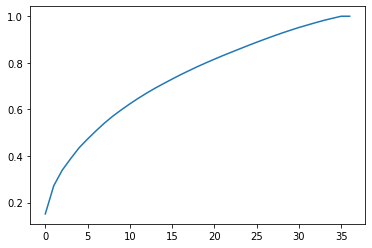

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

we can see 25 components explained 90% varaince

# lets apply svm model with grid search(hyper parameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [ ]:
svm_param = {'C': [0.1, 1, 10], 'gamma' :[0.01, 0.1, 0.001], "kernel" : ["linear", "rbf", "poly"], 'decision_function_shape' : ["ovo", "ovr"]}

In [ ]:
svm_model = GridSearchCV(SVC(), svm_param, cv=10)

In [ ]:
y_tr.drop(index=0,inplace=True)

In [ ]:
svm_model.fit(x_t_pca, y_tr.iloc[:,1])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.01, 0.1, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
y_pred = svm_model.predict(x_te_pca)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0]


In [ ]:
print('SVM accurcy:', round(accuracy_score(y_te.iloc[:,1], y_pred), 3))

SVM accurcy: 0.912


confusion matrix with heatmap

In [ ]:
cm = confusion_matrix(y_te.iloc[:,1], y_pred)

In [ ]:
import seaborn as sns

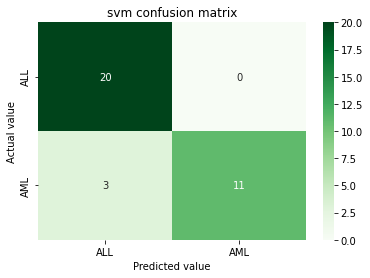

In [ ]:
sns.heatmap(cm, cmap= 'Greens', annot=True, xticklabels=['ALL','AML'], yticklabels=['ALL' , 'AML'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('svm confusion matrix')
plt.show()

PCA VISUALIZATION IN 2D

In [ ]:
PCA2 = PCA(n_components=2)

In [ ]:
p_T =PCA2.fit_transform(x_scal)

Text(0, 0.5, 'second principae component')

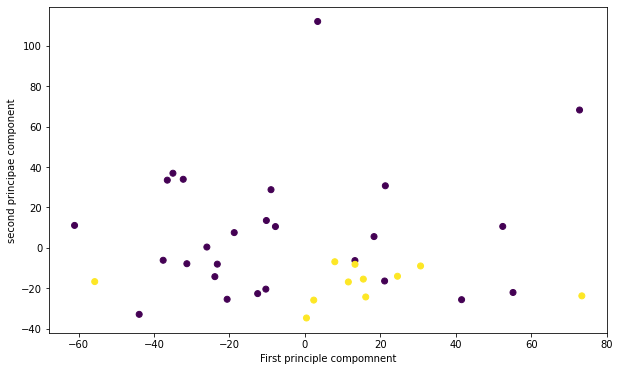

In [ ]:
from os import P_ALL
plt.figure(figsize=(10,6))
plt.scatter(p_T[:,0], p_T[:,1], c=y_tr.iloc[:,1])
plt.xlabel('First principle compomnent')
plt.ylabel('second principle component')

In [ ]:
p_T.shape

(37, 2)